Load moduls

In [3]:
from math import sin, cos, sqrt, atan2, radians
import re, string
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings; warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# House Data Cleaning

In [4]:
df = pd.read_csv('data/houses.csv')

In [5]:
df.head()

,solddate,price,address1,postcode,latitude,longitude,bedrooms,bathrooms,carparkings,agentbrand,location,suburb
0,25-Aug-17,380000,505/7 Katherine Place,3000.0,-37.820240,144.956451,2.0,1,0,City Residential Real Estate,"('-37.82024', '144.956451')",MELBOURNE
1,28-Aug-17,347000,1509/8 Franklin Street,3000.0,-37.807472,144.962021,2.0,1,0,Caine Real Estate,"('-37.8074722', '144.962021')",MELBOURNE
2,26-Aug-17,458000,2107/80 A'Beckett Street,3000.0,-37.809036,144.961090,2.0,1,0,MICM Real Estate,"('-37.8090363', '144.96109')",MELBOURNE
3,24-Aug-17,440000,813/25 Therry Street,3000.0,-37.806942,144.961075,2.0,1,0,Melcorp Property Pty Ltd,"('-37.806942', '144.961075')",MELBOURNE
4,18-Aug-17,550000,2303/568 Collins Street,3000.0,-37.818474,144.955475,2.0,2,0,MICM Real Estate,"('-37.8184738', '144.955475')",MELBOURNE


In [4]:
df = df[~df.location.isnull()]
def calcdist(value):
    
    slt = value.split('\'')

    lat1 = radians(-37.810817)
    lon1 = radians(144.963135)
    lat2 = radians(float(slt[1]))
    lon2 = radians(float(slt[3]))

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    R = 6373.0
    distance = R * c

    return distance

df['dist2cbd'] = df.location.map(calcdist)

In [5]:
df.bedrooms = df.bedrooms.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.carparkings = df.carparkings.astype(int)
df.suburb = df.suburb.str.lower()

In [6]:
print df.shape
df.dropna(inplace=True)
df.isnull().sum()
print df.shape

(203198, 13)
(202512, 13)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202512 entries, 0 to 203201
Data columns (total 13 columns):
solddate       202512 non-null object
price          202512 non-null int64
address1       202512 non-null object
postcode       202512 non-null float64
latitude       202512 non-null float64
longitude      202512 non-null float64
bedrooms       202512 non-null int64
bathrooms      202512 non-null int64
carparkings    202512 non-null int64
agentbrand     202512 non-null object
location       202512 non-null object
suburb         202512 non-null object
dist2cbd       202512 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 21.6+ MB


In [8]:
df.bedrooms.unique()

array([2, 3])

In [9]:
df.bathrooms.unique()

array([ 1,  2,  3,  4,  0,  5,  6, 11])

In [10]:
df[df.bathrooms > 10]

,solddate,price,address1,postcode,latitude,longitude,bedrooms,bathrooms,carparkings,agentbrand,location,suburb,dist2cbd
168627,21-Sep-14,282000,32 Murdoch Court,3429.0,-37.576263,144.758972,3,11,0,Melbourne Estate Agents Roxburgh Park,"('-37.5762634', '144.758972')",sunbury,31.678939


In [11]:
df.drop(168627, axis=0, inplace=True)

In [12]:
df.carparkings.unique()

array([ 0,  1,  2,  3,  4, 20,  6, 12,  5,  8,  7, 10,  9, 15, 13, 11, 16,
       32, 14, 23, 17])

In [13]:
df = df[~(df.carparkings > 4)]

In [14]:
df.shape

(199795, 13)

In [15]:
df = df[~(df.price > 4000000)]
df.shape

(199691, 13)

# EDA

## ALL

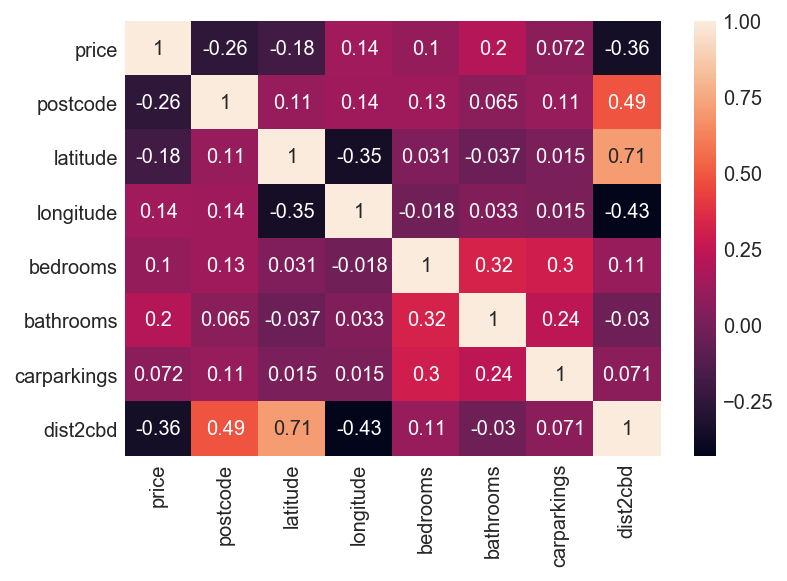

In [16]:
sns.heatmap(df.corr(), annot=True)

## Chosen

In [17]:
choose_sub = ['yarraville', 'newport', 'spotswood', 'kensington',
              'ascot vale', 'moonee ponds', 'coburg', 'clifton hill',
              'northcote', 'malvern east', 'glen iris', 'elsternwick',
              'ormond']

def ch(x):
    if x in choose_sub:
        return True
    else:
        return False
    
ch = df[df.suburb.map(ch)]

In [18]:
ch.suburb.unique()

array(['yarraville', 'newport', 'spotswood', 'kensington', 'ascot vale',
       'moonee ponds', 'coburg', 'clifton hill', 'northcote',
       'malvern east', 'glen iris', 'elsternwick', 'ormond'], dtype=object)

In [19]:
c = ch.drop(['postcode', 'latitude', 'longitude', 'location'], axis=1)

# pd.to_datetime(c.solddate)
def qw(x):
    try:
        s = x.split('-')
        month = s[1]
        return True
    except:
        return False
c = c[c.solddate.map(qw)]

c.solddate = pd.to_datetime(c.solddate)
c.solddate = c.solddate.map(lambda x: x.strftime('%Y-%m'))

In [20]:
# c.groupby(by='solddate').count()['price'][56:-1].plot(kind='bar', figsize=(20,10))

In [21]:
# outliers 
c = c[~(c.price > 4000000)]

In [22]:
me = c.price.median()
ma = c.price.mean()
plt.figure(figsize=(18,10))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
# plt.text(2500000, 0.00000125, s='Median '+str(me), fontsize=30, fontdict={'color':'red'})
# plt.text(2500000, 0.00000105, s='Mean  '+str(round(ma)), fontsize=30, fontdict={'color':'blue'})

# plt.plot([me, me], [0, 0.00000165], 'r-', lw=3)
# plt.plot([ma, ma], [0, 0.00000165], 'b-', lw=3)
# sns.distplot(c.price)

In [23]:
# c.groupby(by='agentbrand').count().sort_values(by='price', ascending=False)

In [24]:
c.bathrooms = c.bathrooms.astype(int)
c.carparkings = c.carparkings.astype(int)
corr = c[['bedrooms', 'bathrooms', 'carparkings', 'dist2cbd', 'price']].corr()
# sns.heatmap(corr, annot=True)

# Model

In [25]:
data = df.copy()
data.drop(['latitude', 'longitude', 'location', 'postcode'], axis=1, inplace=True)
data.drop(19517, axis=0, inplace=True)

In [26]:
def getStreetName(x):
    result = ''.join([i for i in x if not i.isdigit()])
    result = re.sub(r'[^\w]', ' ', result)
    result = ' '.join([x for x in result.split() if len(x) != 1])
    return result.lower()

data.address1 = data.address1.map(getStreetName)

In [27]:
data.shape

(199690, 9)

In [28]:
suburb = pd.read_csv('data/suburb_region.csv')
suburb.columns = ['suburb', 'post', 'region']
suburb.suburb = suburb.suburb.str.lower()
suburb.suburb = suburb.suburb.str.strip()

In [29]:
data = pd.merge(data, suburb, on='suburb', how='left')
data.drop('post', axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [30]:
data.suburb.nunique()

485

In [31]:
data.shape

(162069, 10)

In [32]:
data = data[~(data.region == 'Geelong')]
data.shape

(156753, 10)

In [94]:
#data[(data.bedrooms == 2) & (data.bathrooms == 1) & (data.carparkings == 1) & (data.region == 'Southeastern')]

In [34]:
suburb_dummies = pd.get_dummies(data.suburb, drop_first=True)
region_dummies = pd.get_dummies(data.region, drop_first=True)
street_dummies = pd.get_dummies(data.address1, drop_first=True)

## Linear Reg

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

### Bed, bath, park, dist

In [36]:
X = data[['bedrooms', 'bathrooms', 'carparkings', 'dist2cbd']]
y = data.price.values

ss = StandardScaler()
Xs = ss.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=6)

lr = LinearRegression()
model = lr.fit(x_train, y_train)
cross_val_score(model, x_test, y_test, cv=5)

array([ 0.21275334,  0.21214686,  0.20225148,  0.1971105 ,  0.20542909])

### + region

In [53]:
X = pd.concat([region_dummies, 
               data[['bedrooms', 'bathrooms', 'carparkings', 'dist2cbd']]], 
               axis=1)
y = data.price.values

ss = StandardScaler()
Xs = ss.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=6)

lr = LinearRegression()
model = lr.fit(x_train, y_train)
cross_val_score(model, x_test, y_test, cv=5)

array([ 0.36017512,  0.35851361,  0.35010256,  0.34317336,  0.36002768])

In [57]:
result = pd.DataFrame([y, model.predict(Xs)]).T

In [61]:
result['res'] = result[0] - result[1].astype(int)

### + suburb

In [76]:
data_sub = data[data.region == 'Inner']
suburb_dummies = pd.get_dummies(data_sub.suburb, drop_first=True)

In [77]:
X = pd.concat([suburb_dummies, 
               data_sub[['bedrooms', 'bathrooms', 'carparkings', 'dist2cbd']]], 
               axis=1)
y = data_sub.price.values

ss = StandardScaler()
Xs = ss.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=6)

lr = LinearRegression()
model = lr.fit(x_train, y_train)
np.mean(cross_val_score(model, x_test, y_test, cv=5))

0.38258502220993612

In [70]:
X.shape

(17544, 37)

## Street

In [104]:
def test_suburb(sub):
    d = data[data.suburb == sub]
    street = pd.get_dummies(d.address1, drop_first=True)
    X = pd.concat([street, d[['bedrooms', 'bathrooms', 'carparkings']]], axis=1)
    y = d.price.values
    
    ss = StandardScaler()
    Xs = ss.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=6)

    lr = LinearRegression()
    model = lr.fit(x_train, y_train)
    return np.mean(cross_val_score(model, x_test, y_test, cv=5))

# for s in data.suburb.unique():
#     data_s = data[data.suburb == s]
#     if data_s.shape[0] > 1000:
#         print s
        
test_suburb('southbank')

-3.3726505700967822e+26

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [1]:
data

NameError: name 'data' is not defined